In [54]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import MultiPolygon
import plotly.express as px


In [ ]:
# Attempt to refactor plot function:

def create_plot(plot_func, args):
    fig = plot_func(args[0]
                        , lat='LATITUDE'
                        , lon='LONGITUDE')
                        , center=dict(lat=40.71, lon=-74)
                        , zoom=8.9
                        , mapbox_style="open-street-map"
                        , *args[1:])
    return fig

In [110]:
collisions = gpd.read_file("data/nypd-motor-vehicle-collisions_head.csv")

In [111]:
collisions.shape

(9999, 30)

In [112]:
# Remove rows with unknown Lat or Long
collisions = collisions[collisions.LATITUDE !=""]
collisions = collisions[collisions.LONGITUDE!=""]
collisions.rename(columns={'LATITUDE':'latitude','LONGITUDE':'longitude'}, inplace=True)

collisions.shape

## More general way of doing this:
# collisions.replace('',float("NaN"),inplace=True)
# collisions.dropna(subset=['LONGITUDE','LATITUDE'],inplace=True)

(9148, 30)

In [123]:
collisions.geometry = gpd.points_from_xy(collisions.longitude.astype(float), collisions.latitude.astype(float))
collisions.crs = {'init': 'epsg:4326'}    # Plain lat/long is 4326
collisions = collisions.to_crs(epsg=2263) # Move to the CRS of the hosital data (geometry column changes, lat/long don't)
collisions.head()

/Users/paulgstubley/Library/Python/3.7/lib/python/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,ZIP CODE,latitude,longitude,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,geometry
0,2019-08-05T00:00:00.000,16:30,QUEENS,11434,40.6760520,-73.7901840,"{'type': 'Point', 'coordinates': [-73.790184, ...",,,150-08 123 AVENUE,...,,,,4184637,Sedan,Pick-up Truck,,,,POINT (1042448.797 185650.083)
1,2019-08-27T00:00:00.000,16:02,BROOKLYN,11225,40.6577800,-73.9510960,"{'type': 'Point', 'coordinates': [-73.951096, ...",,,288 HAWTHORNE STREET,...,,,,4195773,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,,,,POINT (997818.728 178927.165)
2,2019-08-15T00:00:00.000,17:57,MANHATTAN,10002,40.7181430,-73.9938350,"{'type': 'Point', 'coordinates': [-73.993835, ...",CHRYSTIE STREET,GRAND STREET,,...,,,,4202457,Sedan,,,,,POINT (985958.971 200915.441)
3,2019-08-30T00:00:00.000,21:53,BRONX,10460,40.8405340,-73.8666100,"{'type': 'Point', 'coordinates': [-73.86661, 4...",,,1837 EAST TREMONT AVENUE,...,,,,4198749,Taxi,Station Wagon/Sport Utility Vehicle,,,,POINT (1021158.508 245534.669)
4,2019-08-06T00:00:00.000,9:45,MANHATTAN,10016,40.7454400,-73.9754000,"{'type': 'Point', 'coordinates': [-73.9754, 40...",EAST 35 STREET,2 AVENUE,,...,,,,4183798,Station Wagon/Sport Utility Vehicle,Bike,,,,POINT (991066.459 210861.489)


In [124]:
fig = px.density_mapbox(collisions
                        , lat='LATITUDE'
                        , lon='LONGITUDE'
                        , radius=8
                        , center=dict(lat=40.71, lon=-74)
                        , zoom=8.9
                        , mapbox_style="open-street-map"
                        , range_color=(0,5) 
                       )
fig.show()

ValueError: Value of 'lat' is not the name of a column in 'data_frame'. Expected one of ['ACCIDENT DATE', 'ACCIDENT TIME', 'BOROUGH', 'ZIP CODE', 'latitude', 'longitude', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'geometry'] but received: LATITUDE

In [125]:
hospitals = gpd.read_file("data/hospitals/hospitals.shp")
hospitals.head()

,id,name,address,zip,factype,facname,capacity,capname,bcode,xcoord,ycoord,latitude,longitude,geometry
0,317000001H1178,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1650 Grand Concourse,10457,3102,Hospital,415,Beds,36005,1008872.0,246596.0,40.843490,-73.911010,POINT (1008872.000 246596.000)
1,317000001H1164,BRONX-LEBANON HOSPITAL CENTER - FULTON DIVISION,1276 Fulton Ave,10456,3102,Hospital,164,Beds,36005,1011044.0,242204.0,40.831429,-73.903178,POINT (1011044.000 242204.000)
2,317000011H1175,CALVARY HOSPITAL INC,1740-70 Eastchester Rd,10461,3102,Hospital,225,Beds,36005,1027505.0,248287.0,40.848060,-73.843656,POINT (1027505.000 248287.000)
3,317000002H1165,JACOBI MEDICAL CENTER,1400 Pelham Pkwy,10461,3102,Hospital,457,Beds,36005,1027042.0,251065.0,40.855687,-73.845311,POINT (1027042.000 251065.000)
4,317000008H1172,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 E 149 St,10451,3102,Hospital,362,Beds,36005,1005154.0,236853.0,40.816758,-73.924478,POINT (1005154.000 236853.000)


In [126]:
hospitals.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [127]:
# Fill null capacities with median capacity
hospitals = hospitals.fillna(hospitals.capacity.median())
hospitals.capacity = hospitals.capacity.astype(float)
hospitals.name     = hospitals.name.str.title()

In [128]:
fig2 = px.scatter_mapbox(hospitals
                         , lat='latitude'
                         , lon='longitude'
                         , size='capacity'
                         , center=dict(lat=40.7, lon=-73.9)
                         , zoom=9
                         , color = 'capacity'
                         , mapbox_style="open-street-map"
                         , color_continuous_scale='Bluered_r'
                         , opacity = .9
                        )
fig2.show()

In [129]:
fig2 = px.scatter_mapbox(hospitals
                         , lat='latitude'
                         , lon='longitude'
                         , size='capacity'
                         , text='name'
                         , center=dict(lat=40.7, lon=-73.9)
                         , zoom=9
                         , mapbox_style="open-street-map"
                         , opacity = .9
                        )
fig2.show()

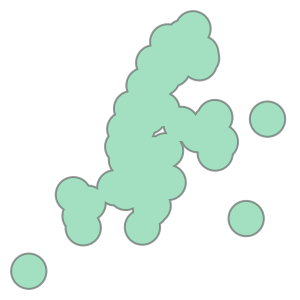

In [130]:
# Create a 10km buffer around each hospital
coverage = pd.DataFrame(hospitals.geometry.buffer(10000), columns = ['buffer'])
near_hospitals = hospitals.geometry.buffer(10000).unary_union
near_hospitals

In [131]:
# Which collisions are outside of this hospital catchment area?
outside_range = collisions[~collisions.geometry.apply(lambda x: near_hospitals.contains(x))]
outside_range.shape


(1347, 30)

In [132]:
# Plot the uncovered collisions along with the hospital locations
fig3 = px.density_mapbox(outside_range
                         , lat='latitude'
                         , lon='longitude'
                         , radius=8
                         , center=dict(lat=40.71, lon=-74)
                         , zoom=8.9
                         , mapbox_style="open-street-map"
                         , range_color=(0,5))

fig3.add_trace(fig2.data[0])
fig3.show()